### Import all the packages

In [22]:
import os
import pandas as pd
import schedule
import time
import pyodbc
import socket
import sqlalchemy as db
from zipfile import ZipFile
import shutil
import matplotlib.pyplot as plt
import seaborn as sns

### Setting up Kaggle API to download dataset

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

### Connecting to SQL Server 2012 using sqlalchemy and pyodbc

In [3]:
engine = db.create_engine(f'mssql+pyodbc://{socket.gethostname()}/Bhavin?trusted_connection=yes&driver=ODBC Driver 17 for SQL Server')

### Build a function which perform bellow task: 
1. Delete mentioned directory
2. Using "!kaggle datasets download" it download the data.
3. Unzip the dataset
4. Read dataset
5. Bulk entry the dataset to the SQL server(SSMS)

In [4]:
def getdata():
    if os.path.exists("C:/Users/bhavi/IBM"):
        shutil.rmtree("C:/Users/bhavi/IBM")
    !kaggle datasets download --force -d pavansubhasht/ibm-hr-analytics-attrition-dataset
    with ZipFile("C:/Users/bhavi/ibm-hr-analytics-attrition-dataset.zip", 'r') as zObject:
          zObject.extractall(
          path="C:/Users/bhavi/IBM")
    ibm = pd.read_csv('C:/Users/bhavi/IBM/WA_Fn-UseC_-HR-Employee-Attrition.csv')
    ibm.to_sql("IBM", con = engine, if_exists = "replace", index= False)
    print("Data Acquire")

In [5]:
getdata()


  0%|          | 0.00/50.1k [00:00<?, ?B/s]
100%|##########| 50.1k/50.1k [00:00<00:00, 6.15MB/s]



Data Acquire


### Function is been schedule everday at 11 pm in the night

In [ ]:
schedule.every().day.at("23:00").do(getdata)

while 1:
    schedule.run_pending()
    time.sleep(1)

Cancel job is used to cancel schedule of a specific job while clear is used to cancel all the jobs 

In [ ]:
#schedule.cancel_job(getdata)
#schedule.clear()

In [9]:
ibm = pd.read_csv('C:/Users/bhavi/IBM/WA_Fn-UseC_-HR-Employee-Attrition.csv')
ibm


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

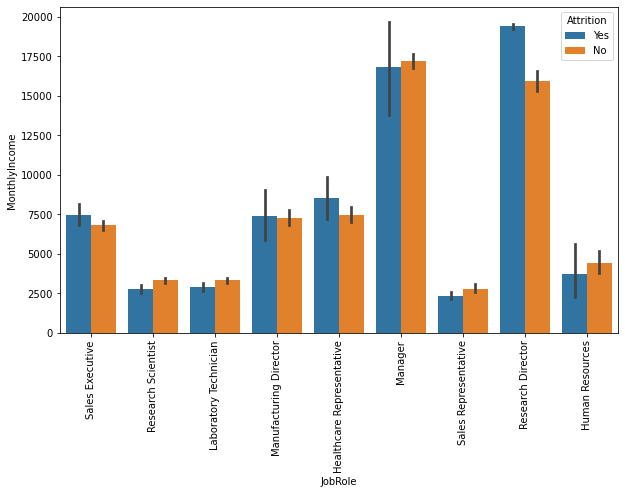

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=ibm)
plt.xticks(rotation=90)

Laboratory technicians, research scientists, sales representatives, and executives all make extremely low salaries, which may be a significant contributing factor to attrition.

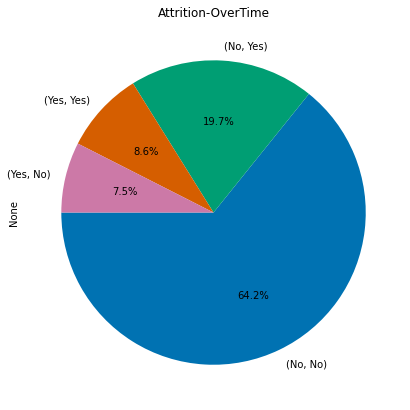

In [27]:
fig=plt.figure(figsize=(7,7))
plt.style.use('seaborn-colorblind')
ibm[["Attrition","OverTime"]].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title('Attrition-OverTime');

8.6% of the data had overtime while attrition made up 16.1% of it. Therefore, 53.4% of former employees have a problem with overtime. However, 23.4 percent of the workforce also works overtime.